In [1]:
from ast import literal_eval
import glob2
import pandas as pd
import numpy as np
import json
import csv
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from keras.preprocessing import image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
outer = pd.read_csv('label_outer.csv', encoding='utf-8')
outer

,image_id,image_name,image_height,image_width,outer_cate,outer_len,outer_mat
0,1016704,1107-14428-14428 (2-1)-20200129-1 (2188).JPG,800,800,짚업,긴팔,우븐
1,1016705,1107-14428-14428 (2-1)-20200129-1 (2189).JPG,800,800,짚업,긴팔,우븐
2,1016706,1107-14428-14428 (2-1)-20200129-1 (2190).JPG,800,800,짚업,긴팔,우븐
3,367088,158089482137760600_1359568660.jpg,1066,800,재킷,긴팔,데님
4,367093,158089482366643300_686358314.jpg,1066,800,재킷,긴팔,데님
...,...,...,...,...,...,...,...
19836,931762,20200929-1 (705).JPG,800,800,베스트,민소매,니트
19837,931763,20200929-1 (706).JPG,800,800,베스트,민소매,니트
19838,931775,20200929-1 (718).JPG,800,800,베스트,민소매,니트
19839,931781,20200929-1 (724).JPG,800,800,베스트,민소매,니트


In [3]:
df_outer = pd.get_dummies(data = outer, columns = ['outer_cate', 'outer_len', 'outer_mat'])
df_outer

,image_id,image_name,image_height,image_width,outer_cate_가디건,outer_cate_베스트,outer_cate_재킷,outer_cate_점퍼,outer_cate_짚업,outer_cate_코트,...,outer_mat_우븐,outer_mat_울/캐시미어,outer_mat_자카드,outer_mat_저지,outer_mat_코듀로이,outer_mat_트위드,outer_mat_패딩,outer_mat_퍼,outer_mat_플리스,outer_mat_헤어 니트
0,1016704,1107-14428-14428 (2-1)-20200129-1 (2188).JPG,800,800,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
1,1016705,1107-14428-14428 (2-1)-20200129-1 (2189).JPG,800,800,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
2,1016706,1107-14428-14428 (2-1)-20200129-1 (2190).JPG,800,800,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
3,367088,158089482137760600_1359568660.jpg,1066,800,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,367093,158089482366643300_686358314.jpg,1066,800,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19836,931762,20200929-1 (705).JPG,800,800,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19837,931763,20200929-1 (706).JPG,800,800,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19838,931775,20200929-1 (718).JPG,800,800,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19839,931781,20200929-1 (724).JPG,800,800,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df_outer.columns

Index(['image_id', 'image_name', 'image_height', 'image_width',
       'outer_cate_가디건', 'outer_cate_베스트', 'outer_cate_재킷', 'outer_cate_점퍼',
       'outer_cate_짚업', 'outer_cate_코트', 'outer_cate_패딩', 'outer_len_7부소매',
       'outer_len_긴팔', 'outer_len_민소매', 'outer_len_반팔', 'outer_len_캡',
       'outer_mat_가죽', 'outer_mat_네오프렌', 'outer_mat_니트', 'outer_mat_데님',
       'outer_mat_레이스', 'outer_mat_린넨', 'outer_mat_메시', 'outer_mat_무스탕',
       'outer_mat_벨벳', 'outer_mat_비닐/PVC', 'outer_mat_스웨이드', 'outer_mat_시폰',
       'outer_mat_실크', 'outer_mat_우븐', 'outer_mat_울/캐시미어', 'outer_mat_자카드',
       'outer_mat_저지', 'outer_mat_코듀로이', 'outer_mat_트위드', 'outer_mat_패딩',
       'outer_mat_퍼', 'outer_mat_플리스', 'outer_mat_헤어 니트'],
      dtype='object')

In [5]:
from keras.preprocessing import image
from tqdm import tqdm

In [6]:
train_image = []
for i in tqdm(range(0, 300)):
    img = image.load_img('C:/img/'+df_outer['image_name'][i],target_size=(400,400,3))
    img = image.img_to_array(img)
    img = img/255
    train_image.append(img)

100%|██████████| 300/300 [00:03<00:00, 87.95it/s] 


In [7]:
print(len(train_image))

300


In [8]:
X = np.array(train_image[:300])
X.shape

(300, 400, 400, 3)

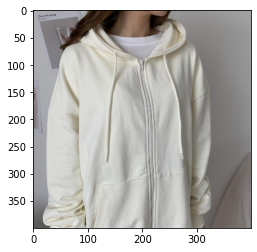

In [9]:
plt.imshow(X[1])

In [10]:
y = np.array(df_outer.drop(['image_id', 'image_name', 'image_height', 'image_width'], axis=1)[:300])
len(y)

300

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.1)

In [12]:
print(X_train.shape)
print(y_train.shape)

(270, 400, 400, 3)
(270, 35)


In [14]:
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=(5, 5), activation="relu", input_shape=(400,400,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(35, activation='sigmoid'))

In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 396, 396, 16)      1216      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 198, 198, 16)      0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 198, 198, 16)      0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 194, 194, 32)      12832     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 97, 97, 32)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 97, 97, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 93, 93, 64)       

In [16]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [20]:
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), batch_size=64)

Epoch 1/10
5/5 [==============================] - 119s 20s/step - loss: 0.2455 - accuracy: 0.1778 - val_loss: 0.2270 - val_accuracy: 0.0000e+00
Epoch 2/10
5/5 [==============================] - 64s 12s/step - loss: 0.2411 - accuracy: 0.1111 - val_loss: 0.2099 - val_accuracy: 0.0000e+00
E

In [22]:
for i in range(5):
    model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), batch_size=64)

Epoch 1/10
5/5 [==============================] - 84s 16s/step - loss: 0.1866 - accuracy: 0.1444 - val_loss: 0.1948 - val_accuracy: 0.0000e+00
Epoch 2/10
5/5 [==============================] - 63s 12s/step - loss: 0.1898 - accuracy: 0.1481 - val_loss: 0.1990 - val_accuracy: 0.0000e+00
E

In [23]:
loss_and_metrics = model.evaluate(X_test, y_test, batch_size=64)
print('')
print('loss_and_metrics : ' + str(loss_and_metrics))

1/1 [==============================] - 2s 2s/step - loss: 0.1630 - accuracy: 0.1667

loss_and_metrics : [0.16303440928459167, 0.1666666716337204]


In [24]:
model.save('model_outer.h5')
print('saved')

saved
